In [1]:
# install necessary libraries for data visualization
!pip install seaborn
!pip install matplotlib
!pip install plotly
!pip install cufflinks
!pip install folium
!pip install geopy


  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68727 sha256=567fab4518b3942b23d9a17d56e623a6c8644655831366ffb7154a0da12b333e
  Stored in directory: c:\users\donia\appdata\local\pip\cache\wheels\6b\76\62\6da97734911ffcbdd559fd1a3f28526321f0ae699182a23866
Successfully built cufflinks


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import cufflinks as cf
import folium
from folium.plugins import HeatMap
from geopy.geocoders import Nominatim

# read the data
df = pd.read_csv('data/lockbit2-v2.csv')
df.head()

,_id,branches_count,company_name,company_status,content,country,deadline,description,display_name,employees_count,...,last_seen,latitude,link,longitude,revenue,revenue_range,source,technologies_used,views,year_founded
0,645654cf7adef2f79c969d2d,0.0,joysonsafety.com,active,We took 20TB of data from the company and are ...,United States,"11 May, 2023 19:57:59 UTC",Joyson Safety Systems is a global leader in mo...,Joyson Safety Systems,NaN,...,2023-05-06T23:21:06.221Z,42.660212,http://lockbitapt6vx57t3eeqjofwgcglmutr3a35nyg...,-83.243045,NaN,NaN,lockbit,"[""WordPress""]",1487,NaN
1,645654d37adef2f79c969d2e,4.0,layherna.com,active,Layher North America is a company that operate...,United States,"10 May, 2023 07:41:18 UTC",Layher is the world's largest producer and lea...,LAYHER INC,NaN,...,2023-05-06T23:21:06.221Z,29.649757,http://lockbitapt6vx57t3eeqjofwgcglmutr3a35nyg...,-95.258255,NaN,200M - 1B,lockbit,"[""Amazon Cloudfront"",""Google Tag Manager"",""Sal...",1549,1986.0
2,645654e37adef2f79c969d2f,0.0,fullertonindia.com,active,"Founded in 1994 and headquartered in Mumbai, I...",India,"03 May, 2023 19:34:31 UTC",Fullerton India Credit Company Limited is regi...,Fullerton India Credit Company Limited,NaN,...,2023-05-06T23:21:06.221Z,NaN,http://lockbitapt6vx57t3eeqjofwgcglmutr3a35nyg...,NaN,NaN,> 1B,lockbit,"[""Amazon Cloudfront"",""CloudFlare"",""Google Doub...",4247,1994.0
3,645654e77adef2f79c969d30,0.0,triaflex.at,NaN,Welcome to TRIAFLEX\nWe design the ergonomic l...,Austria,"17 May, 2023 15:44:34 UTC",NaN,Triaflex Innovative Sitz-und Gesundheitssysteme,NaN,...,2023-05-06T23:21:06.221Z,48.297900,http://lockbitapt6vx57t3eeqjofwgcglmutr3a35nyg...,14.277070,NaN,NaN,lockbit,NaN,1907,NaN
4,645654ea7adef2f79c969d31,0.0,cydsa.com,active,"Cydsa, S.A.B. de C.V., together its subsidiari...",Mexico,"08 May, 2023 01:15:09 UTC",Cydsa SAB de CV (Cydsa) is a Mexico-based hold...,Cydsa SAB de CV,1690.0,...,2023-05-06T23:21:06.221Z,NaN,http://lockbitapt6vx57t3eeqjofwgcglmutr3a35nyg...,NaN,448319548.0,200M - 1B,lockbit,"[""MaxCDN"",""WordPress""]",2305,1945.0


In [3]:
# count the number of rows and columns
df.shape

(693, 23)

In [4]:
# check the data types
df.dtypes

_id                   object
branches_count       float64
company_name          object
company_status        object
content               object
country               object
deadline              object
description           object
display_name          object
employees_count      float64
employees_range       object
industry              object
ispublished             bool
last_seen             object
latitude             float64
link                  object
longitude            float64
revenue              float64
revenue_range         object
source                object
technologies_used     object
views                  int64
year_founded         float64
dtype: object

In [5]:
# check the missing values
df.isnull().sum()

_id                    0
branches_count       128
company_name           0
company_status       142
content                6
country              129
deadline               0
description          195
display_name         128
employees_count      493
employees_range      288
industry             177
ispublished            0
last_seen              0
latitude             490
link                   0
longitude            490
revenue              622
revenue_range        273
source                 0
technologies_used     14
views                  0
year_founded         237
dtype: int64

In [6]:
# check the number of unique values for each column
df.nunique(axis=0)

_id                  693
branches_count        20
company_name         680
company_status         1
content              684
country               66
deadline             693
description          485
display_name         552
employees_count      141
employees_range        8
industry              95
ispublished            2
last_seen              1
latitude             195
link                 693
longitude            195
revenue               57
revenue_range          7
source                 1
technologies_used    166
views                681
year_founded         115
dtype: int64

In [ ]:
# count the unique values for ac

# Data Cleaning and Preparation

In [7]:
# print the unique values for 'revenue_range' column
print(df['revenue_range'].unique())
def convert_revenue_range_to_average(revenue_range):
    if pd.isnull(revenue_range):
        return revenue_range
    revenue_range = str(revenue_range)

    if '>' in revenue_range or '<' in revenue_range:
        revenue_range = revenue_range.replace('>', '')
        revenue_range = revenue_range.replace('<', '')
        revenue_range = revenue_range.replace(' ', '')
        revenue_range = revenue_range.replace('$', '')
        revenue_range = revenue_range.replace(',', '')
        if 'B' in revenue_range:
            revenue_range = revenue_range.replace('B', '')
            revenue_range = float(revenue_range) * 1e9
        elif 'M' in revenue_range:
            revenue_range = revenue_range.replace('M', '')
            revenue_range = float(revenue_range) * 1e6
        else:
            revenue_range = float(revenue_range)
        return revenue_range
    else:
        lower, upper = revenue_range.split(' - ')
        lower = lower.replace(' ', '')
        lower = lower.replace('$', '')
        lower = lower.replace(',', '')
        upper = upper.replace(' ', '')
        upper = upper.replace('$', '')
        upper = upper.replace(',', '')
        if 'B' in lower:
            lower = lower.replace('B', '')
            lower = float(lower) * 1e9
        elif 'M' in lower:
            lower = lower.replace('M', '')
            lower = float(lower) * 1e6
        else:
            lower = float(lower)
        if 'B' in upper:
            upper = upper.replace('B', '')
            upper = float(upper) * 1e9
        elif 'M' in upper:
            upper = upper.replace('M', '')
            upper = float(upper) * 1e6
        else:
            upper = float(upper)
        
        return (lower + upper) / 2
new_df = df.copy()
# convert the 'revenue_range' column from Series object to numeric
new_df['revenue_range'] = new_df['revenue_range'].apply(convert_revenue_range_to_average)
print(df['revenue_range'].unique())
print(new_df['revenue_range'].unique())
# drop the id column
new_df.drop('_id', axis=1, inplace=True)
new_df.drop('last_seen', axis=1, inplace=True)
new_df.drop('link', axis=1, inplace=True)
# show random 5 rows
new_df.sample(10)



[nan '200M - 1B' '> 1B' '0 - 1M' '10M - 50M' '1M - 10M' '100M - 200M'
 '50M - 100M']
[nan '200M - 1B' '> 1B' '0 - 1M' '10M - 50M' '1M - 10M' '100M - 200M'
 '50M - 100M']
[    nan 6.0e+08 1.0e+09 5.0e+05 3.0e+07 5.5e+06 1.5e+08 7.5e+07]


,branches_count,company_name,company_status,content,country,deadline,description,display_name,employees_count,employees_range,industry,ispublished,latitude,longitude,revenue,revenue_range,source,technologies_used,views,year_founded
481,25.0,groupe-helios.com,active,"Chez Hélios, les femmes et les hommes sont au ...",France,"10 Aug, 2022 22:07:38 UTC",Groupe Hélios est présent partout en France à ...,Groupe Hélios,NaN,200 - 500,Construction,True,NaN,NaN,30000000.0,30000000.0,lockbit,"[""Google Analytics"",""Google Tag Manager"",""Word...",23263,2000.0
293,6.0,colonialgeneral.com,active,"At Colonial General, our goal is to offer top ...",United States,"10 Dec, 2022 15:53:54 UTC","Founded in 1985, Colonial General Insurance Ag...","COLONIAL GENERAL INSURANCE AGENCY, INC",60.0,50 - 200,Financial Services,True,33.641182,-111.896550,NaN,5500000.0,lockbit,"[""CloudFlare"",""Google Tag Manager"",""WordPress""]",17325,1985.0
438,0.0,trufab.com,active,"Tru-Fab Technology, Inc. is a full-service com...",United States,"08 Sep, 2022 10:33:26 UTC","Tru-Fab Technology, Inc. is a full-service com...","Tru-Fab Technology, Inc.",43.0,10 - 50,Mining & Metals,True,41.633690,-81.440980,NaN,5500000.0,lockbit,[],22313,1995.0
386,0.0,southamptoncounty.org,active,"Founded in 1749, Southampton County, Virginia,...",United States,"21 Sep, 2022 00:15:21 UTC","Welcome to Southampton County, VA",COURTLAND YOUTH ATHLETIC ASSOCIATION,NaN,NaN,Civic & Social Organization,True,36.689278,-77.018050,0.0,500000.0,lockbit,"[""MaxCDN""]",20163,NaN
601,NaN,jka.co.uk,NaN,Jackson Kent Associates started trading in Jul...,NaN,"27 Dec, 2022 22:44:55 UTC",NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,lockbit,[],17926,NaN
580,0.0,jetboxcargo.com,active,El Corporativo JetBox como especialista en el ...,United States,"03 Mar, 2023 16:49:19 UTC",NaN,"JET BOX CARGO, INC.",NaN,1 - 10,Transportation/Trucking/Railroad,True,NaN,NaN,NaN,500000.0,lockbit,"[""Google Tag Manager""]",11499,1996.0
634,NaN,"Nihonsakari Co. , Ltd",NaN,"Nihonsakari Co. , Ltd\nNihonsakari Co., Ltd. (...",NaN,"08 Oct, 2022 22:32:32 UTC",NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,lockbit,[],31447,NaN
463,0.0,ah-a.de,active,Axel Höer Architekten is a construction firm. ...,Germany,"20 Aug, 2022 02:12:20 UTC",Axel Höer Architekten – das mutige Architektur...,Höer u. Wittig,NaN,NaN,NaN,True,51.145143,12.641444,NaN,NaN,lockbit,[],27881,NaN
655,NaN,camdomain.com,NaN,LOL,NaN,"20 Sep, 2022 22:16:02 UTC",NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,lockbit,[],20011,NaN
485,0.0,ymaunivers.com,active,From using composite wood 50 years ago to toda...,Taiwan,"09 Aug, 2022 02:51:37 UTC",We are one of the leading Carbon Fiber/ Glass ...,YMA Corporation,NaN,NaN,Utilities,True,NaN,NaN,NaN,NaN,lockbit,"[""Google Tag Manager"",""WooCommerce"",""WordPress""]",30211,1968.0


In [8]:
print(new_df['employees_range'].unique())
# process the 'employees_range' column
def convert_range_employee_to_average(employees_range):
  if pd.isnull(employees_range):
    return employees_range
  employees_range = str(employees_range)
  if '>' in employees_range or '<' in employees_range:
    employees_range = employees_range.replace('>', '')
    employees_range = employees_range.replace('<', '')
    employees_range = employees_range.replace(' ', '')
    employees_range = employees_range.replace(',', '')
    if 'K' in employees_range:
      employees_range = employees_range.replace('K', '')
      employees_range = int(employees_range) * 1e3
    elif 'M' in employees_range:
      employees_range = employees_range.replace('M', '')
      employees_range = int(employees_range) * 1e6
    else:
      employees_range = int(employees_range)
    return employees_range
  elif '-' in employees_range:
    employees_range = employees_range.replace(' ', '')
    employees_range = employees_range.replace(',', '')
    employees_range = employees_range.split('-')
    lower = int(employees_range[0])
    upper = int(employees_range[1])
  else:
    lower = int(employees_range)
    upper = int(employees_range)

  return (lower + upper) / 2

new_df['employees_range'] = new_df['employees_range'].apply(convert_range_employee_to_average)
new_df['employees_range'].unique()

  

[nan '1,000 - 5,000' '5,000 - 10,000' '1 - 10' '200 - 500' '10 - 50'
 '50 - 200' '500 - 1,000' '> 10,000']


array([     nan, 3.00e+03, 7.50e+03, 5.50e+00, 3.50e+02, 3.00e+01,
       1.25e+02, 7.50e+02, 1.00e+04])

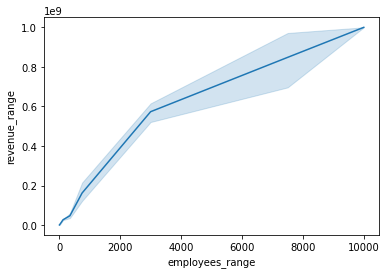

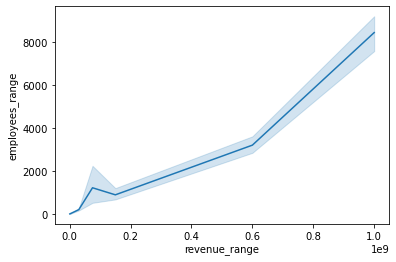

In [10]:
# plot the raltionship between 'revenue_range' and 'employees_range' using a line plot
# remove the rows with missing values in 'revenue_range' and 'employees_range' columns
new_df = new_df.dropna(subset=['revenue_range', 'employees_range'])


sns.lineplot(x='employees_range', y='revenue_range', data=new_df)
plt.show()
sns.lineplot(x='revenue_range', y='employees_range', data=new_df)
plt.show()



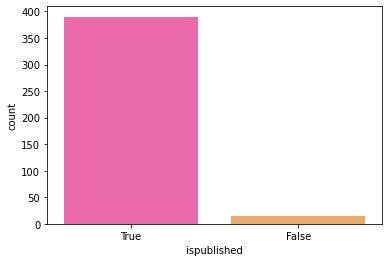

In [11]:
# plot bar plot for ispublished column and display the count for each category on the top of the bar
sns.countplot(x='ispublished', data=new_df, palette='spring', linewidth=1, order=new_df['ispublished'].value_counts().index)
plt.show()

# EDA

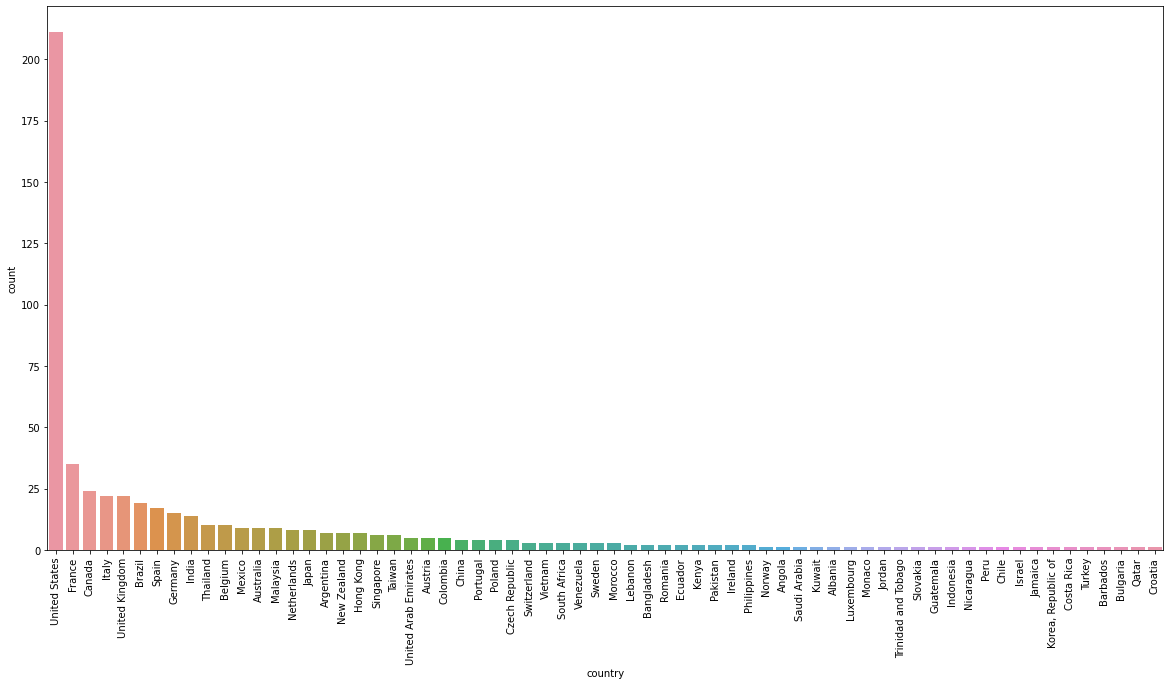

In [12]:
# plot the number of samples for each country and sort them in descending order
plt.figure(figsize=(20, 10))
sns.countplot(x='country', data=df, order=df['country'].value_counts().index)
plt.xticks(rotation=90)
plt.show()


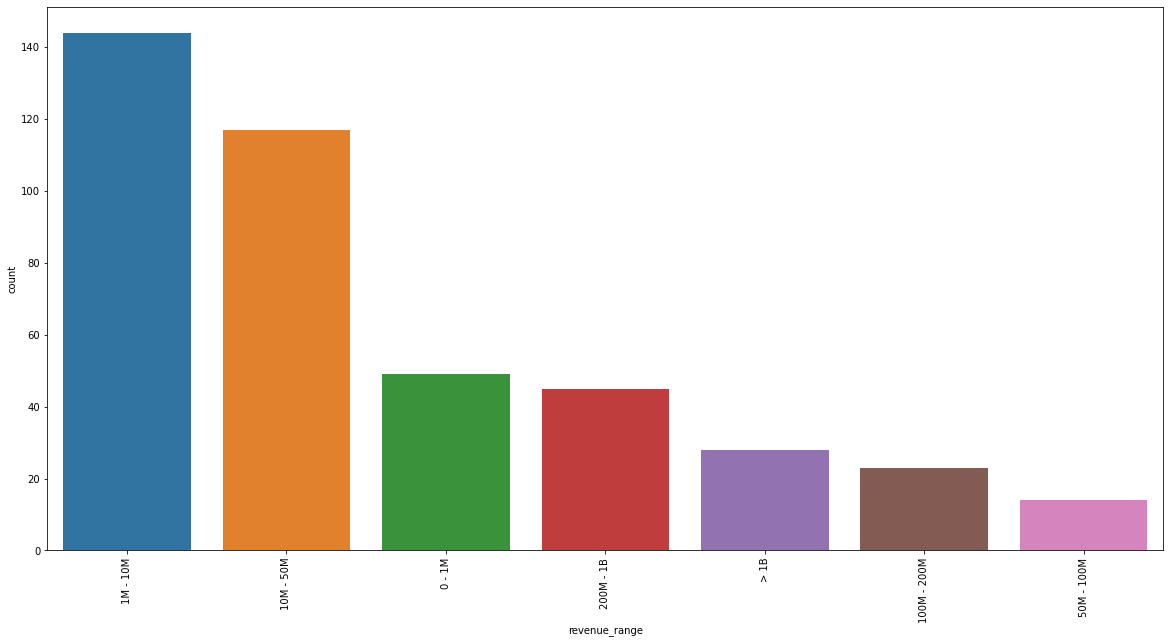

In [15]:
# group the data by revenue_range and count the number of samples for each revenue_range
df.groupby('revenue_range').size()
# plot the number of samples for each revenue_range
plt.figure(figsize=(20, 10))
sns.countplot(x='revenue_range', data=df, order=df['revenue_range'].value_counts().index)
plt.xticks(rotation=90)
plt.show()


14
0                                        ["WordPress"]
1    ["Amazon Cloudfront","Google Tag Manager","Sal...
2    ["Amazon Cloudfront","CloudFlare","Google Doub...
4                               ["MaxCDN","WordPress"]
5                               ["Google Tag Manager"]
Name: technologies_used, dtype: object
178
Index(['_id', 'branches_count', 'company_name', 'company_status', 'content',
       'country', 'deadline', 'description', 'display_name', 'employees_count',
       'employees_range', 'industry', 'ispublished', 'last_seen', 'latitude',
       'link', 'longitude', 'revenue', 'revenue_range', 'source',
       'technologies_used', 'views', 'year_founded'],
      dtype='object')
(501, 23)
0                                        ["WordPress"]
1    ["Amazon Cloudfront", "Google Tag Manager", "S...
2    ["Amazon Cloudfront", "CloudFlare", "Google Do...
4                              ["MaxCDN", "WordPress"]
5                               ["Google Tag Manager"]
Name: technologie

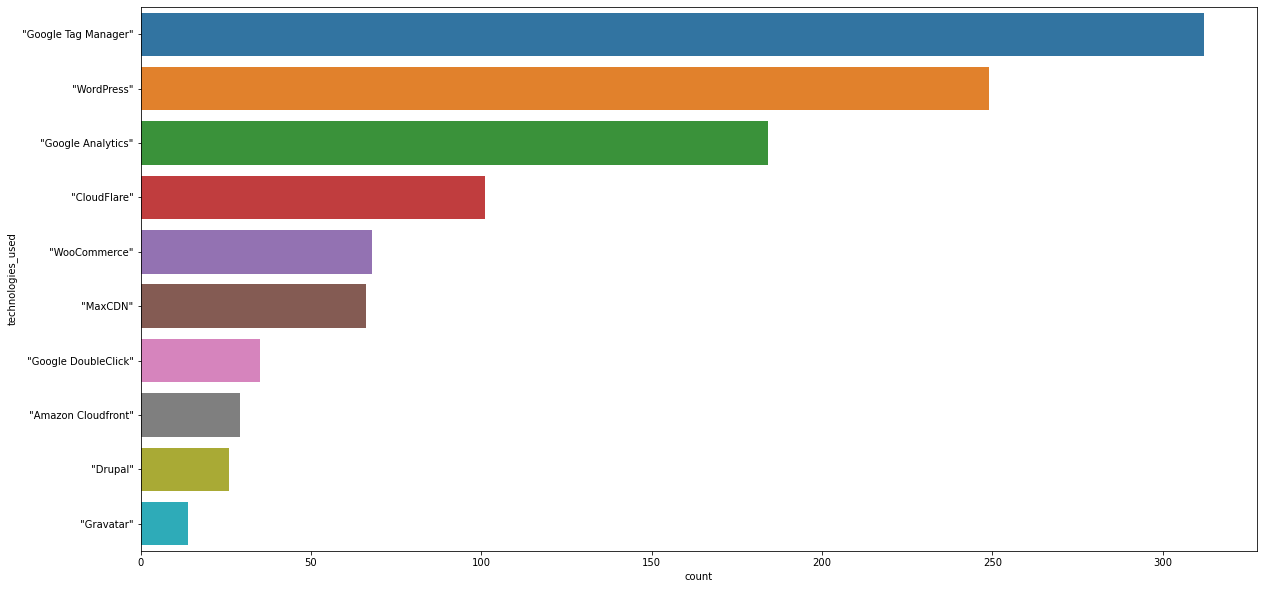

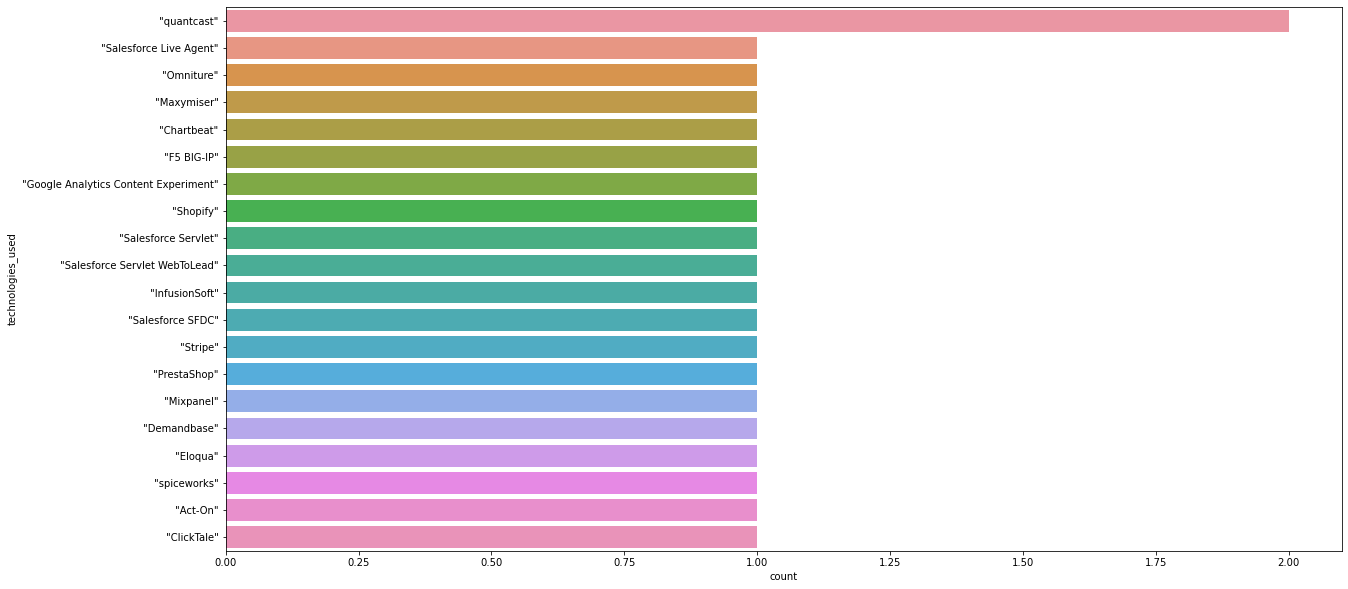

56


In [60]:
# count the number of empty lists in the `technologies_used` column
# count nulls first
print(df['technologies_used'].isnull().sum())

col = df['technologies_used'].dropna()
# count empty lists
print(col.head())
# 
new_col = col.apply(lambda x:  1 if len(x)== 2 else 0)
print(new_col.sum())
col2= df.copy()
# drop nulls in the `technologies_used` column
col2.dropna(subset=['technologies_used'], inplace=True)
print(col2.columns)
new_col2 = col2[col2["technologies_used"]!="[]"]
print(new_col2.shape)

techs = new_col2['technologies_used'].apply(lambda x: x[1:-1].split(','))
print(techs.head())
#count each technology
techs = techs.explode()
print(techs.head())
print(techs.value_counts())
# plot the top 10 technologies used by companies
plt.figure(figsize=(20, 10))
sns.countplot(y=techs, order=techs.value_counts().iloc[:10].index)
plt.show()

# plot the least 10 technologies used by companies
plt.figure(figsize=(20, 10))
sns.countplot(y=techs, order=techs.value_counts().iloc[-20:].index)
plt.show()

print(len(techs.unique()))

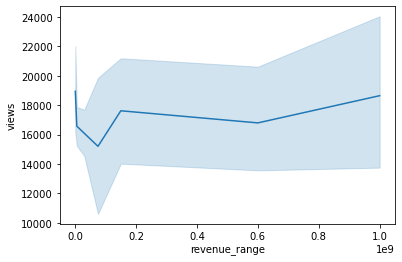

In [ ]:
# line plot between 'revenue_range' and 'views' columns
sns.lineplot(x='revenue_range', y='views', data=new_df)
plt.show()



['Computer Hardware' 'Financial Services' 'Chemicals'
 'Information Technology and Services' 'Construction'
 'Architecture & Planning' 'Nonprofit Organization Management' 'Wholesale'
 'Hospital & Health Care' 'Mechanical or Industrial Engineering'
 'Law Practice' 'Printing' 'Telecommunications'
 'Marketing and Advertising' 'Food Production' 'Civil Engineering'
 'Manufacturing' 'Mining & Metals' 'Management Consulting'
 'Computer Software' 'Mental Health Care' 'Oil & Energy' 'Real Estate'
 'Pharmaceuticals' 'Legal Services' 'Maritime' 'Government Relations'
 'Retail' nan 'Machinery' 'Medical Devices' 'Health, Wellness and Fitness'
 'Transportation/Trucking/Railroad' 'Facilities Services' 'Furniture'
 'Logistics and Supply Chain' 'Government Administration' 'Internet'
 'Apparel & Fashion' 'Package/Freight Delivery' 'Staffing and Recruiting'
 'Accounting' 'Consumer Services' 'International Trade and Development'
 'Restaurants' 'Civic & Social Organization'
 'Recreational Facilities and Se

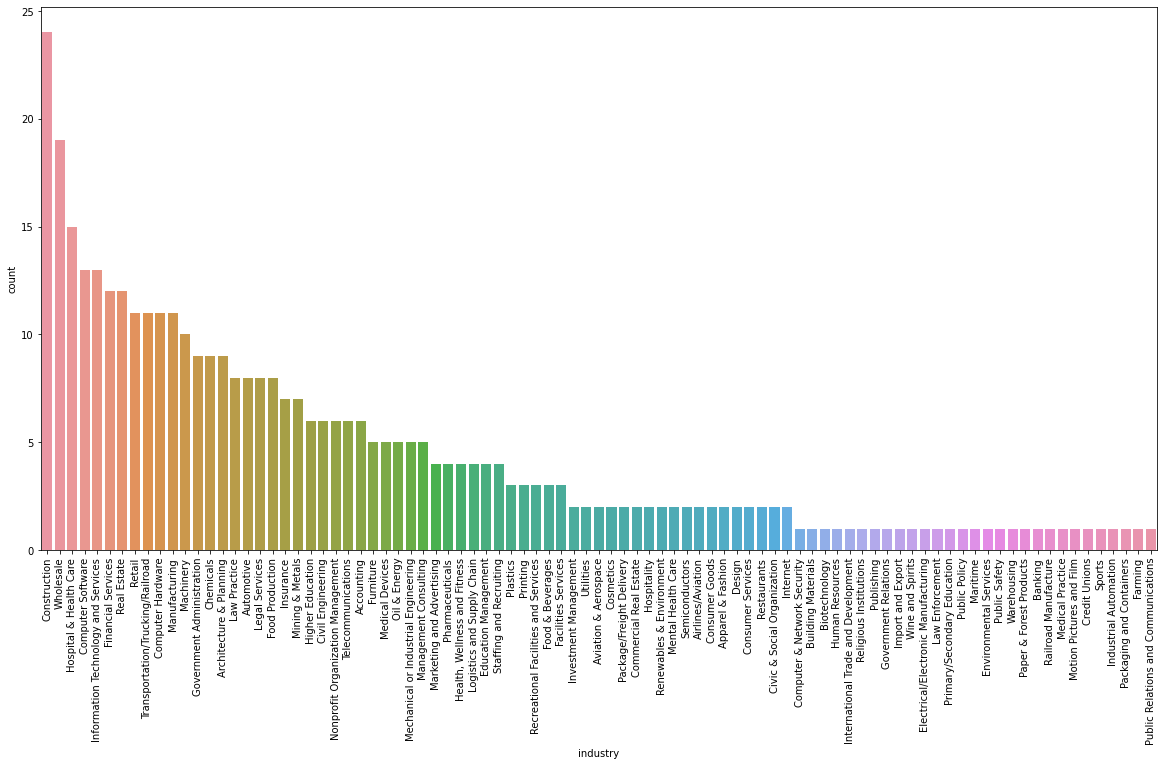

In [ ]:
# print the unique values for 'industry' column
print(new_df['industry'].unique())
# plot the number of samples for each industry and sort them in descending order
plt.figure(figsize=(20, 10))
sns.countplot(x='industry', data=new_df, order=new_df['industry'].value_counts().index)
plt.xticks(rotation=90)
plt.show()



In [ ]:
new_df_country_industry = df[df["country"] == "United States"]
# drop the rows with missing values in 'country' and 'industry' columns
new_df_country_industry = new_df_country_industry.dropna(subset=['country', 'industry'])
# group the data by 'country' and 'industry' and count the number of samples for each group
new_df_country_industry2 = new_df_country_industry.groupby(['country', 'industry']).size().reset_index(name='counts')
new_df_country_industry2.sorted = new_df_country_industry2.sort_values(by='counts', ascending=False)
new_df_country_industry2.sorted.head(10)

<ipython-input-101-f857ab6db72c>:6: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



,country,industry,counts
14,United States,Construction,15
31,United States,Hospital & Health Care,13
65,United States,Wholesale,11
12,United States,Computer Hardware,11
48,United States,Nonprofit Organization Management,7
38,United States,Legal Services,7
13,United States,Computer Software,7
3,United States,Architecture & Planning,6
24,United States,Financial Services,5
59,United States,Retail,5


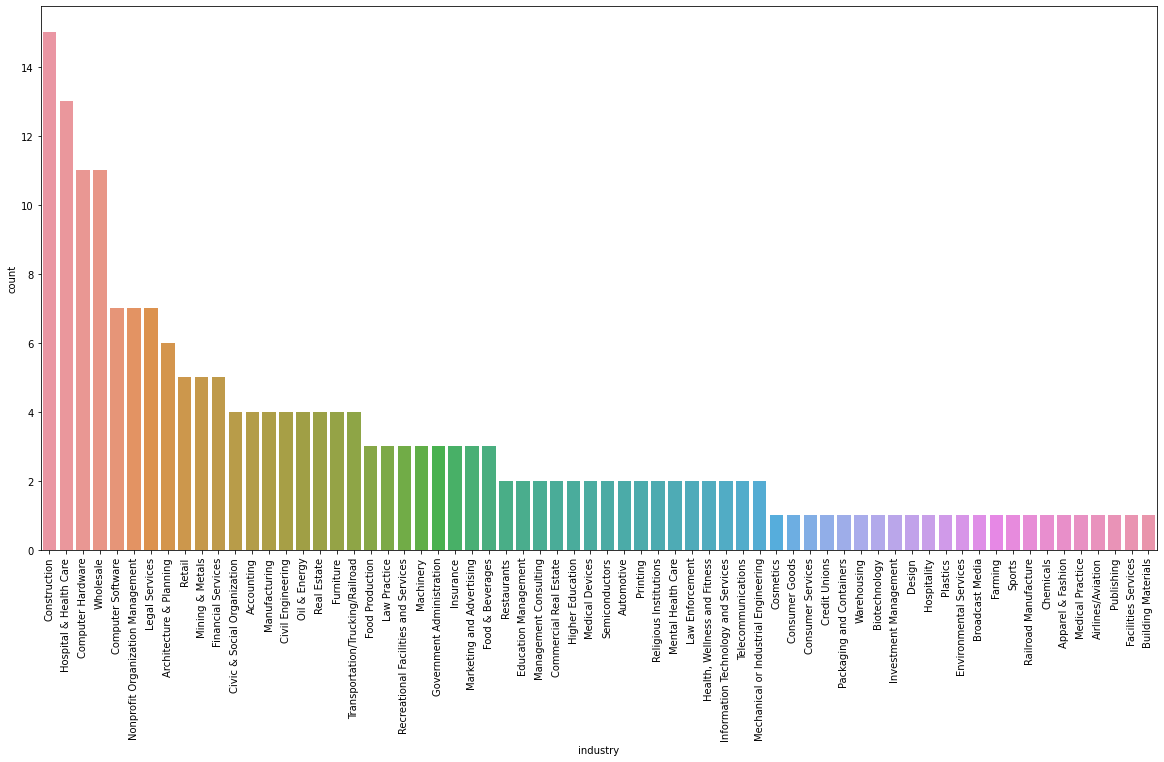

In [ ]:
# plot the number of samples for each industry in the United States and sort them in descending order
plt.figure(figsize=(20, 10))
sns.countplot(x='industry', data=new_df_country_industry, order=new_df_country_industry['industry'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# branches_count       128
# company_status       142
# country              129
# employees_range      288
# industry             177
# revenue_range        273
# views                  0
# year_founded         237



In [103]:
# we eill try to answer the following question about the data: Are startups in Europe vulnerable to attacks, given that companies in the USA rank among the countries most vulnerable to attacks ?

# drop the rows with missing values in 'country' or 'employee_range' columns
print(df.shape)
mew_df_country_employee = df.dropna(subset=['employees_range'])
print(df.shape)

print(mew_df_country_employee.shape)
# count the nulls in the 'country' column
print(df['country'].isnull().sum())
print(df.shape)

new_df_country_employee = df.dropna(subset=['country'])
print(df.shape)

print(new_df_country_employee['country'].isna().sum())

print(mew_df_country_employee.shape)

new_df_2 = df.copy()
# drop the rows with missing values in 'country' or 'employee_range' columns
new_df_2.dropna(subset=['country'], inplace=True)
print(new_df_2.shape)
# count the revenue_range nulls
print(new_df_2['revenue_range'].isnull().sum())
# drop the rows with missing values in 'employees_range' column
new_df_2.dropna(subset=['employees_range'], inplace=True)
print(new_df_2.shape)
# print the unique values for 'employees_range' column
print(new_df_2['employees_range'].unique())



(693, 23)
(693, 23)
(405, 23)
129
(693, 23)
(693, 23)
0
(405, 23)
(564, 23)
144
(405, 23)
['1,000 - 5,000' '5,000 - 10,000' '1 - 10' '200 - 500' '10 - 50'
 '50 - 200' '500 - 1,000' '> 10,000']


In [79]:
# check if there are rows with null countries but not null longitude and latitude
df[df['country'].isnull() & df['longitude'].notnull()]


,_id,branches_count,company_name,company_status,content,country,deadline,description,display_name,employees_count,...,last_seen,latitude,link,longitude,revenue,revenue_range,source,technologies_used,views,year_founded


In [78]:
# check if there are rows with null employee_range but not null country_range

# get the rows with null employee_range but not null country_range
new_df_1 = df[df['employees_range'].notnull() & df['revenue_range'].isnull()]
new_df_1.shape


(0, 23)

In [82]:
new_df_1 = df[df['country'].notnull() & df['employees_range'].isnull()]
new_df_1.shape

(159, 23)

In [137]:
from scipy.stats import chi2_contingency

def statistcal_test(df,miss_val_col,exp_col):
    # print(df[miss_val_col].isnull())
    true_col=df[df[miss_val_col].isnull()].groupby(exp_col)[exp_col].count()
    false_col=df[df[miss_val_col].notna()].groupby(exp_col)[exp_col].count()
    table= pd.concat([true_col,false_col],axis=1)
    table.columns=["True","False"]
    # replace nulls with 0
    table.fillna(0,inplace=True)
    print(table)
    chi2, p, dof, ex = chi2_contingency(table)
    print("The p-value with {} is equal to {}".format(exp_col,p))
    if p<0.05:
        # print("The missingness in the {} column depend on the {} one".format(miss_val_col,exp_col))
        print("it is exptected to be **MAR**")


df_copy = df.copy()
# drop the rows with missing values in 'country'
df_copy.dropna(subset=['country'], inplace=True)
for col in ["country","branches_count", "year_founded", "industry", "revenue_range"]:

    statistcal_test(df_copy,"employees_range",col)
    print("---------------------------------------------------------")
print("=========================================================")


              True  False
Argentina      5.0    2.0
Australia      3.0    6.0
Austria        2.0    3.0
Belgium        3.0    7.0
Brazil        12.0    7.0
...            ...    ...
Norway         0.0    1.0
Qatar          0.0    1.0
Saudi Arabia   0.0    1.0
Slovakia       0.0    1.0
Turkey         0.0    1.0

[66 rows x 2 columns]
The p-value with country is equal to 2.201913564374875e-07
it is exptected to be **MAR**
---------------------------------------------------------
                 True  False
branches_count              
0.0             146.0  277.0
1.0               5.0   60.0
2.0               2.0   32.0
3.0               0.0   17.0
4.0               1.0    3.0
5.0               1.0    3.0
6.0               0.0    4.0
7.0               0.0    1.0
8.0               0.0    1.0
9.0               0.0    1.0
17.0              0.0    1.0
18.0              1.0    0.0
21.0              1.0    0.0
23.0              0.0    1.0
25.0              0.0    1.0
43.0              0.0    

In [129]:
# fill the missing values in 'employees_range' column using KNN imputer and the columns 'country', 'branches_count', 'revenue_range'
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)
df_copy = df.copy()

# get the knn imputer
df_copy =df_copy[["country","branches_count", "revenue_range","employees_range"]]
# convert the 'revenue_range' column from Series object to categorical codes
df_copy['country'] = df_copy['country'].astype('category').cat.codes
df_copy['branches_count'] = df_copy['branches_count'].astype('category').cat.codes
df_copy['revenue_range'] = df_copy['revenue_range'].astype('category').cat.codes
df_copy['employees_range'] = df_copy['employees_range'].astype('category').cat.codes
# fit the knn imputer
knn_imputer.fit(df_copy)
# fill the missing values with the knn imputer
df_copy=knn_imputer.transform(df_copy)
df_copy=pd.DataFrame(df_copy, columns=["country","branches_count", "revenue_range","employees_range"])


In [131]:
# count the nulls in the 'employees_range' column
print(df_copy['employees_range'].isnull().sum())
print(df_copy['branches_count'].isnull().sum())
print(df_copy['revenue_range'].isnull().sum())
print(df_copy['country'].isnull().sum())

0
0
0
0


In [138]:
#get country unique values
print(df['country'].unique())

['United States' 'India' 'Austria' 'Mexico' 'Italy' 'Belgium' 'Pakistan'
 'Spain' 'Malaysia' 'Morocco' 'Croatia' 'France' 'Germany' 'Hong Kong'
 'Colombia' 'Canada' 'Sweden' 'Japan' 'Kuwait' 'United Arab Emirates'
 'United Kingdom' 'Argentina' 'Switzerland' 'Angola' 'Romania' 'Brazil'
 'Israel' nan 'Bangladesh' 'Thailand' 'Poland' 'Peru' 'Philippines'
 'Vietnam' 'Czech Republic' 'South Africa' 'Australia' 'Taiwan' 'Lebanon'
 'Slovakia' 'Singapore' 'Jordan' 'Netherlands' 'Luxembourg' 'Portugal'
 'Indonesia' 'China' 'Albania' 'Trinidad and Tobago' 'Saudi Arabia'
 'Venezuela' 'New Zealand' 'Monaco' 'Kenya' 'Jamaica' 'Ecuador' 'Norway'
 'Chile' 'Korea, Republic of' 'Costa Rica' 'Turkey' 'Qatar' 'Bulgaria'
 'Nicaragua' 'Ireland' 'Guatemala' 'Barbados']


In [140]:
european_countries = ['Austria', 'Belgium', 'Croatia', 'Czech Republic', 'France', 'Germany', 'Italy', 'Luxembourg', 'Monaco', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Spain', 'Sweden', 'Switzerland', 'United Kingdom', 'Albania']


In [141]:
#add clumn to check if the country is european or in usa or other
df['country_type'] = df['country'].apply(lambda x: 'european' if x in european_countries else ('usa' if x == 'United States' else 'other'))
print(df['country_type'].unique())

['usa' 'other' 'european']


In [148]:
# [nan '1,000 - 5,000' '5,000 - 10,000' '1 - 10' '200 - 500' '10 - 50'
#  '50 - 200' '500 - 1,000' '> 10,000']

small_compamies = ['1 - 10',  '10 - 50', '50 - 200']
# add column to check if the company is small or not
df['company_size'] = df['employees_range'].apply(lambda x: 'small' if x in small_compamies else 'big')
print(df['company_size'].unique())

['big' 'small']


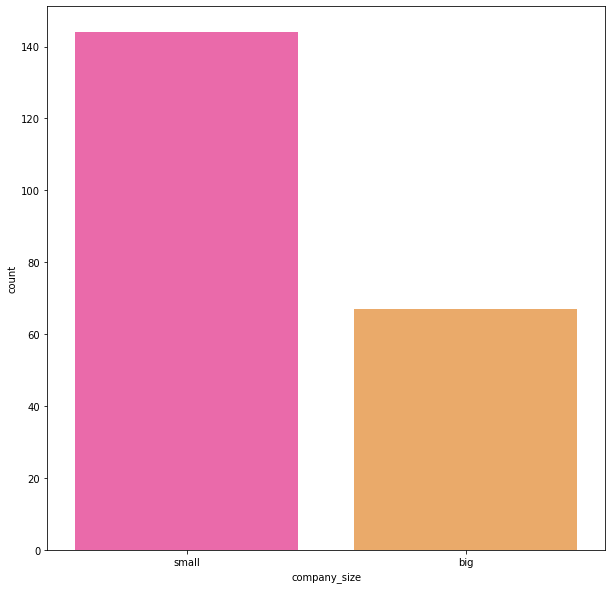

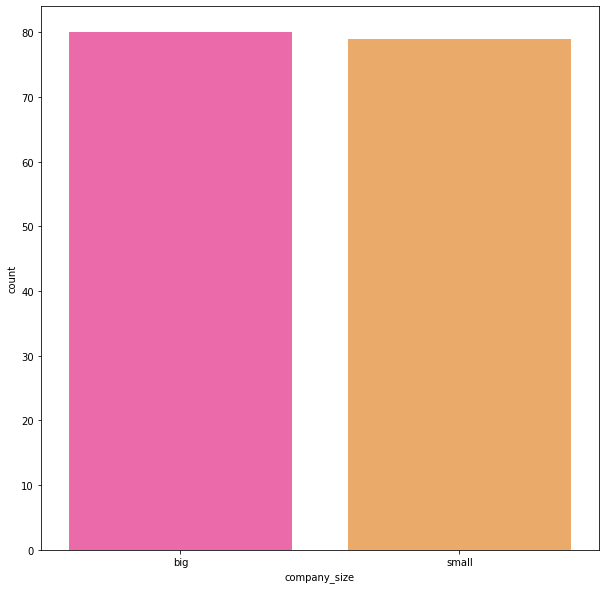

In [151]:
# drow pie chart for the company size in usa only
df_usa = df[df['country'] == 'United States']
plt.figure(figsize=(10, 10))
sns.countplot(x='company_size', data=df_usa, palette='spring', linewidth=1, order=df_usa['company_size'].value_counts().index)
plt.show()

# drow pie chart for the company size in europe only
df_europe = df[df['country_type'] == 'european']
plt.figure(figsize=(10, 10))
sns.countplot(x='company_size', data=df_europe, palette='spring', linewidth=1, order=df_europe['company_size'].value_counts().index)
plt.show()

In [155]:
from statsmodels.stats.proportion import proportions_ztest
# Calculate proportion of startups that have been attacked in Europe and USA
prop_europe = len(df_europe[df_europe['company_size']=='small']) / len(df_europe)
prop_usa = len(df_usa[df_usa['company_size']=='small']) / len(df_usa)

#print(prop_europe, prop_usa)
# Calculate sample sizes for Europe and USA
n_europe = len(df_europe)
n_usa = len(df_usa)

# Calculate standard errors for Europe and USA
se_europe = np.sqrt(prop_europe * (1 - prop_europe) / n_europe)
se_usa = np.sqrt(prop_usa * (1 - prop_usa) / n_usa)

# Conduct two-sample proportion test
count = np.array([len(df_europe), len(df_usa)])
nobs = np.array([n_europe, n_usa])
stat, pval = proportions_ztest(count, nobs)

# Print results
print(f"Proportion of startups attacked in Europe: {prop_europe:.4f}")
print(f"Proportion of startups attacked in USA: {prop_usa:.4f}")
print(f"Sample size for Europe: {n_europe}")
print(f"Sample size for USA: {n_usa}")
print(f"Standard error for Europe: {se_europe:.4f}")
print(f"Standard error for USA: {se_usa:.4f}")
print(f"Test statistic: {stat:.4f}")
print(f"P-value: {pval:.4f}")

Proportion of startups attacked in Europe: 0.4969
Proportion of startups attacked in USA: 0.6825
Sample size for Europe: 159
Sample size for USA: 211
Standard error for Europe: 0.0397
Standard error for USA: 0.0320
Test statistic: nan
P-value: nan


c:\Users\Donia\anaconda3\lib\site-packages\statsmodels\stats\weightstats.py:671: RuntimeWarning:

invalid value encountered in double_scalars

